In [19]:
'''
__author__ = 'Alex Cheng'
ensemble 集成方法：bagging, boosting, RF

Baggin算法：bootstrap，每一个样本集训练一个基学习器，回归问题，结果为均值，
            分类问题是从不同类别所占的百分比引申出来各种类别的概率和均值

bootstrap: 有放回采样

'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import datasets,linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.externals.six import StringIO
from math import sqrt
import random

In [20]:
# 合成数组的产生
n = 1000
xt = [(float(i)/float(n) - 0.5) for i in range(n+1)]
x = [[s] for s in xt]
# y has random noise added to x-value
# set seed
np.random.seed(1)
y = [s + np.random.normal(scale=0.1) for s in xt] # 上市正态分布的噪音(0,1) * 0.1

print(len(x),len(x[0]))

1001 1


In [24]:
# 固定 30%采样
nsample = int(n * 0.30)
idxTest = random.sample(range(n),nsample) # 随机30%抽取
idxTest.sort()
idxTrain = [idx for idx in range(n) if not(idx in idxTest)]

# 定义测试和训练的属性和列表
xTrain = [x[r] for r in idxTrain]
xTest  = [x[r] for r in idxTest]
yTrain = [y[r] for r in idxTrain]
yTest  = [y[r] for r in idxTest] # 列向量

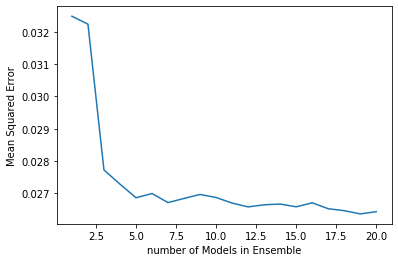

In [22]:
# 训练一组模型
numTreeMax = 20 # 最大决策树的数目
treeDepth = 1 # 树的深度
modelList = []
predList = []

nBagSamples = int(len(xTrain) * 0.5) # 多少个样本用于随机抽样

for i in range(numTreeMax): # 不同决策树数量
    idxBag = random.sample(range(len(xTrain)), nBagSamples)
    xTrainBag = [xTrain[j] for j in idxBag]
    yTrainBag = [yTrain[j] for j in idxBag]
    
    modelList.append(DecisionTreeRegressor(max_depth=treeDepth))
    modelList[-1].fit(xTrainBag,yTrainBag)
    
    latestPred = modelList[-1].predict(xTest)
    predList.append(list(latestPred))
    
    
mse = []
allPred = []

for iModel in range(len(modelList)): # 模型个数,随着模型
    pred = []
    for iPred in range(len(xTest)):
        # 在iModel个决策树下，预测的均值
        pred.append(sum([predList[i][iPred] for i in range(iModel+1)]) / (iModel+1) ) # +1 防止除数为0
    
    allPred.append(pred)
    errors = [(yTest[i] - pred[i]) for i in range(len(yTest))]
    mse.append(sum([e * e for e in errors])/len(yTest))

nModels = [i+1 for i in range(len(modelList))]
plt.plot(nModels,mse)
plt.axis('tight')
plt.xlabel('number of Models in Ensemble')
plt.ylabel('Mean Squared Error')
plt.show()

# 当决策树数据增加时，均方误差变化
# 添加的噪音标准差为0.1，预测的最佳均方误差那么应该就是标准差的平方，就是0.01

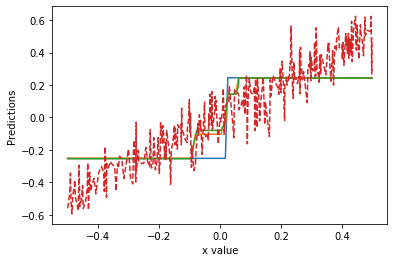

In [23]:
plotList = [0,9,19]
for i in plotList:
    plt.plot(xTest,allPred[i]) # allPred[i]是第i个集成的预测值
plt.plot(xTest,yTest,linestyle='--')
plt.axis('tight')
plt.xlabel('x value')
plt.ylabel('Predictions')
plt.show()